In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from filters import conv_2d, my_filters, blend_images, gaussian_pyramid

添加椒盐噪声

In [2]:
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#设置添加椒盐噪声的数目比例
s_vs_p = 0.1
#设置添加噪声图像像素的数目
amount = 0.01
noisy_img = np.copy(img)
#添加salt噪声
num_salt = np.ceil(amount * img.size * s_vs_p)
#设置添加噪声的坐标位置
coords = [np.random.randint(0,i - 1, int(num_salt)) for i in img.shape]
noisy_img[coords[0],coords[1],:] = [255,255,255]
#添加pepper噪声
num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
#设置添加噪声的坐标位置
coords = [np.random.randint(0,i - 1, int(num_pepper)) for i in img.shape]
noisy_img[coords[0],coords[1],:] = [0,0,0]

均值滤波与高斯滤波

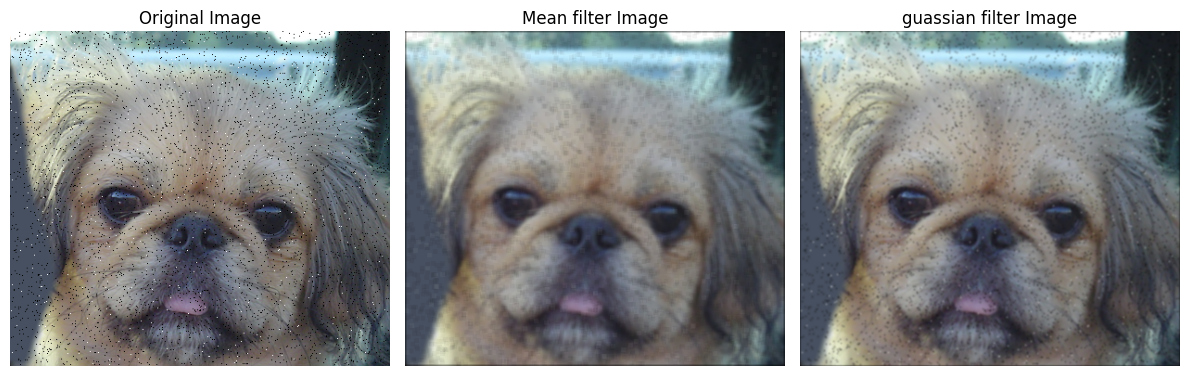

In [3]:
out1 = conv_2d(noisy_img, 5)
out2 = conv_2d(noisy_img, 5, 1)
plt.figure(figsize=(12, 4))

# 第一个子图显示原始图像
plt.subplot(1, 3, 1)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Original Image')

# 第二个子图显示处理后的图像
plt.subplot(1, 3, 2)
plt.imshow(out1)
plt.axis('off')
plt.title('Mean filter Image')

# 第三个子图显示处理后的图像
plt.subplot(1, 3, 3)
plt.imshow(out2)
plt.axis('off')
plt.title('guassian filter Image')

# 显示所有子图
plt.tight_layout()
plt.show()

高通滤波

In [4]:
img = cv2.imread('cat.jpg')
b, g, r = cv2.split(img)

# 对每个通道进行高通滤波
filter_B, md_B = my_filters(b, 10, 'high-pass')
filter_G, md_G = my_filters(g, 10, 'high-pass')
filter_R, md_R = my_filters(r, 10, 'high-pass')

# 合并通道
filtered_img = cv2.merge((filter_B, filter_G, filter_R))
filtered_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)

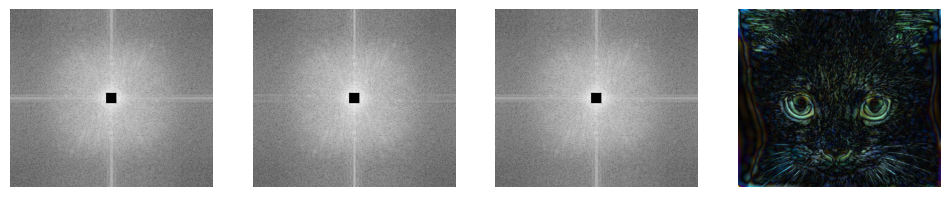

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(141), plt.imshow(md_R, cmap='gray'), plt.axis('off')
plt.subplot(142), plt.imshow(md_G, cmap='gray'), plt.axis('off')
plt.subplot(143), plt.imshow(md_R, cmap='gray'), plt.axis('off')
plt.subplot(144), plt.imshow(filtered_img, cmap='gray'), plt.axis('off')
plt.show()

In [6]:
img = cv2.imread('dog.jpg')
b, g, r = cv2.split(img)

# 对每个通道进行低通滤波
filter_B, md_B = my_filters(b, 30, 'low-pass')
filter_G, md_G = my_filters(g, 30, 'low-pass')
filter_R, md_R = my_filters(r, 30, 'low-pass')

# 合并通道
filtered_img = cv2.merge((filter_B, filter_G, filter_R))
filtered_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)

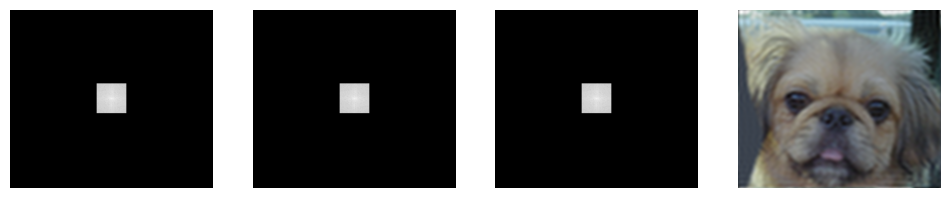

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(141), plt.imshow(md_R, cmap='gray'), plt.axis('off')
plt.subplot(142), plt.imshow(md_G, cmap='gray'), plt.axis('off')
plt.subplot(143), plt.imshow(md_R, cmap='gray'), plt.axis('off')
plt.subplot(144), plt.imshow(filtered_img, cmap='gray'), plt.axis('off')
plt.show()

图像融合

In [8]:
img1 = cv2.imread('dog.jpg')
img2 = cv2.imread('cat.jpg')
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

img1_b, img1_g, img1_r = cv2.split(img1)
img2_b, img2_g, img2_r = cv2.split(img2)

# 对每个通道进行低通滤波
out_B = blend_images(img1_b, img2_b, 30, 15, 15)
out_G = blend_images(img1_g, img2_g, 30, 15, 15)
out_R = blend_images(img1_r, img2_r, 30, 15, 15)

# 合并通道
blend_image = cv2.merge((out_B, out_G, out_R))
blend_image = cv2.cvtColor(blend_image, cv2.COLOR_BGR2RGB)

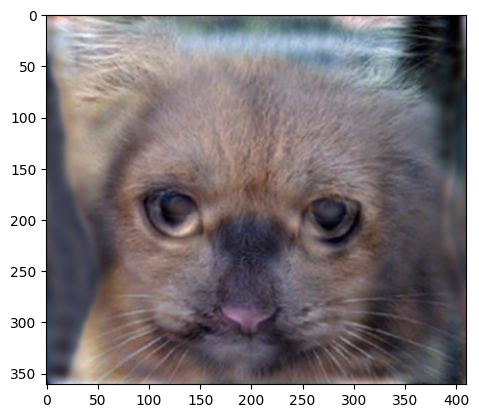

In [9]:
plt.imshow(blend_image)
plt.show()

图像金字塔采样

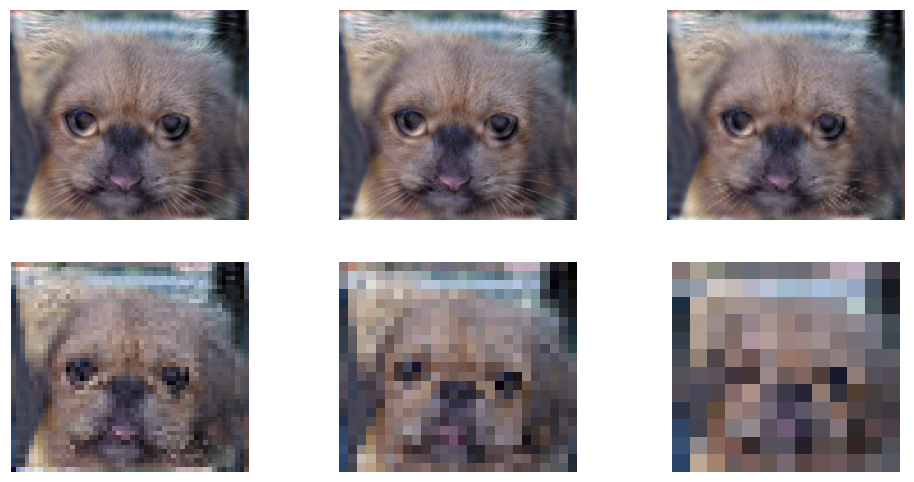

In [19]:
import matplotlib.pyplot as plt

pic_list = gaussian_pyramid(blend_image, 6)

plt.figure(figsize=(12, 6))  # 设置画布大小

num_images = len(pic_list)
rows = 2
cols = (num_images + 1) // 2  # 向上取整

for i in range(num_images):
    if i < cols:
        plt.subplot(2, cols, i + 1)
    else:
        plt.subplot(2, cols, i + 1 + num_images % 2)  # 考虑奇数情况下最后一列的偏移
    plt.imshow(pic_list[i])
    plt.axis('off')

plt.show()
